In [1]:
from utils.save_data import clean_all_csv_files
clean_all_csv_files()

In [1]:
from models.trainModel import load_model
different_traning_sizes = [10,25,50,75,100,150,200,250,300,350,400,500,1000,2000,10000,50000]
ai_models = list(map(lambda x: load_model(f"CNN_paper_work_AB_CD_{x}"),different_traning_sizes))

CNN_paper_work_AB_CD_10
making the model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0         
            

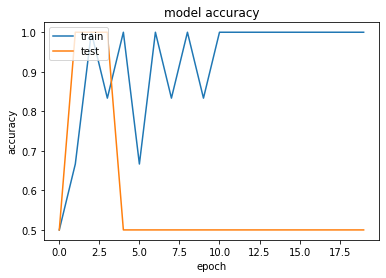

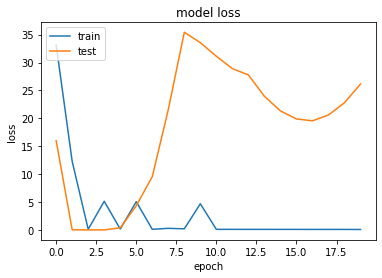

Confusion matrix:
[[0 1]
 [0 1]]


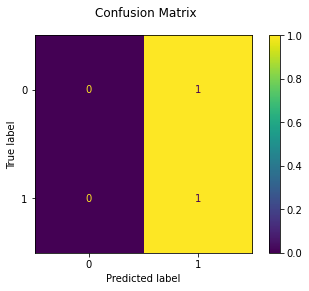

CNN_paper_work_AB_CD_25
making the model...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 64)        0         
          

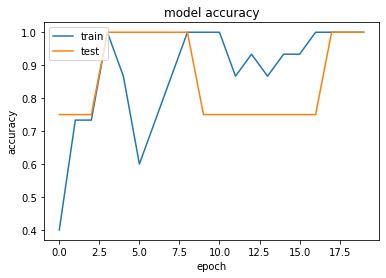

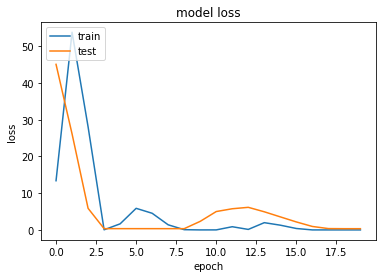

Confusion matrix:
[[3 0]
 [0 3]]


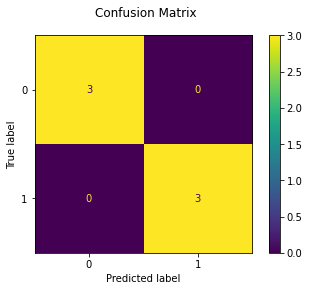

CNN_paper_work_AB_CD_50
making the model...
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 32, 32, 64)        0         
          

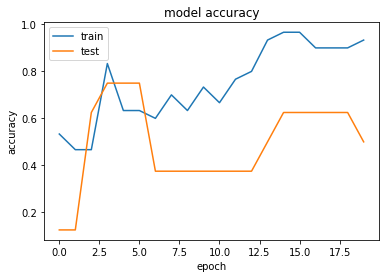

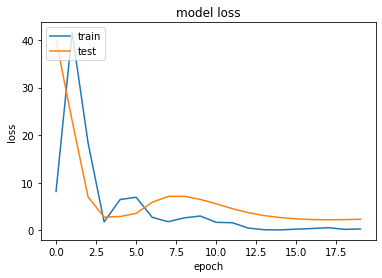

Confusion matrix:
[[2 5]
 [0 5]]


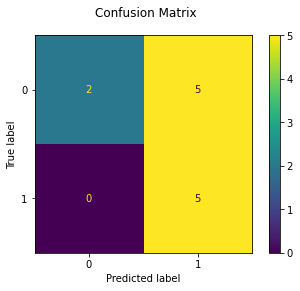

CNN_paper_work_AB_CD_75
making the model...
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 32, 32, 64)        0         
          

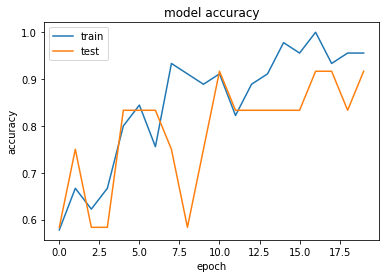

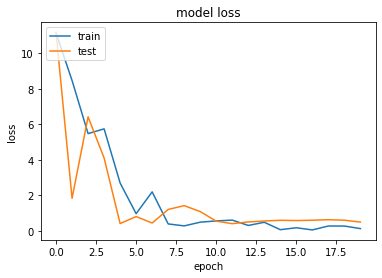

Confusion matrix:
[[7 5]
 [1 5]]


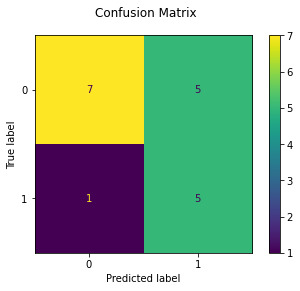

CNN_paper_work_AB_CD_100
making the model...
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 32, 32, 64)        0         
         

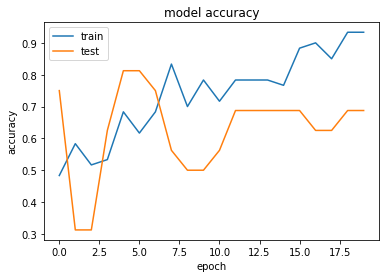

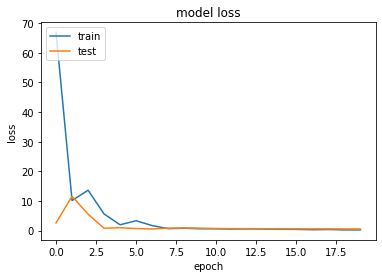

Confusion matrix:
[[8 9]
 [4 3]]


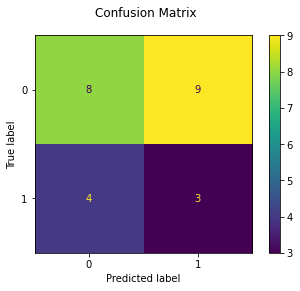

CNN_paper_work_AB_CD_150
making the model...
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_26 (LeakyReLU)  (None, 32, 32, 64)        0         
         

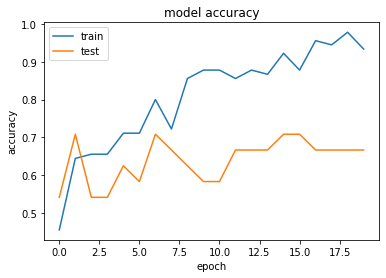

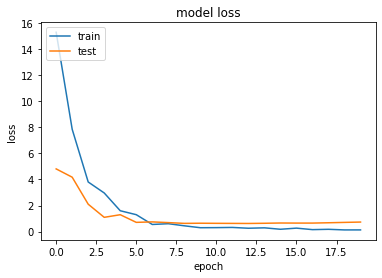

Confusion matrix:
[[17  3]
 [ 5 11]]


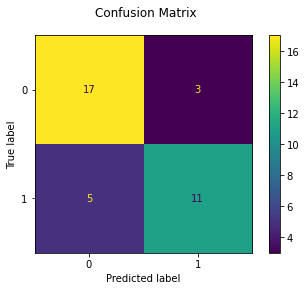

CNN_paper_work_AB_CD_200
making the model...
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_31 (LeakyReLU)  (None, 32, 32, 64)        0         
         

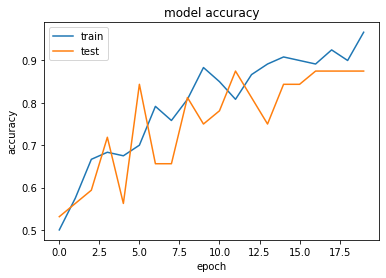

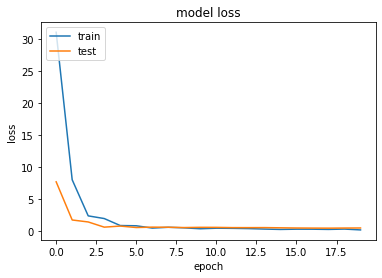

Confusion matrix:
[[17 10]
 [ 4 17]]


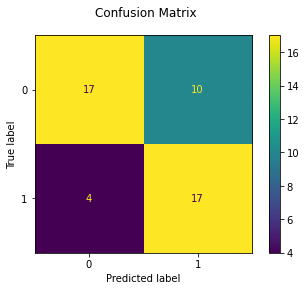

CNN_paper_work_AB_CD_250
making the model...
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 leaky_re_lu_35 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_36 (LeakyReLU)  (None, 32, 32, 64)        0         
         

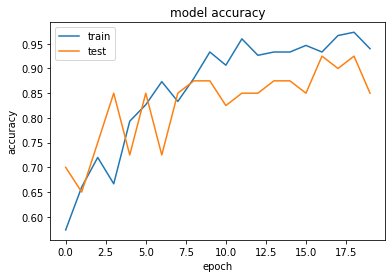

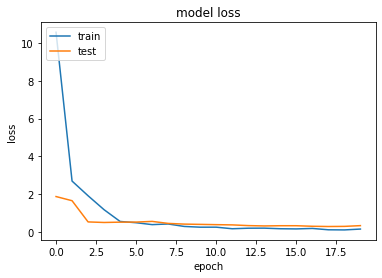

Confusion matrix:
[[27  9]
 [ 7 17]]


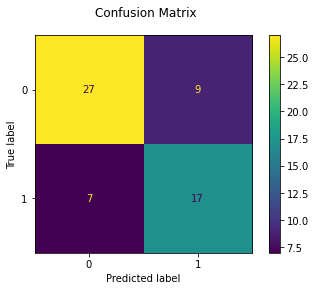

CNN_paper_work_AB_CD_300
making the model...
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 leaky_re_lu_40 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_32 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_41 (LeakyReLU)  (None, 32, 32, 64)        0         
         

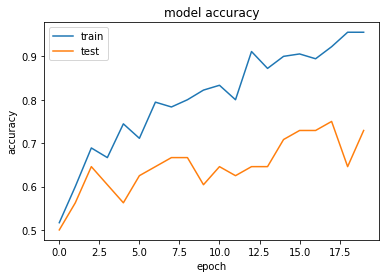

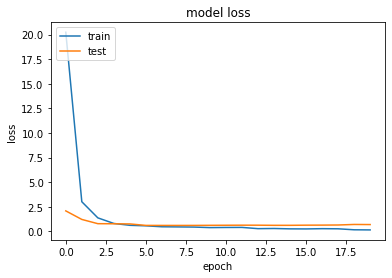

Confusion matrix:
[[29 11]
 [ 5 27]]


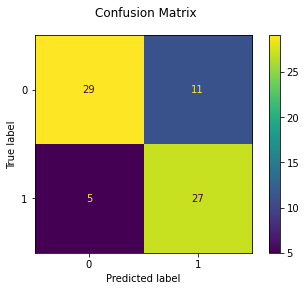

CNN_paper_work_AB_CD_350
making the model...
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 leaky_re_lu_45 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_46 (LeakyReLU)  (None, 32, 32, 64)        0         
         

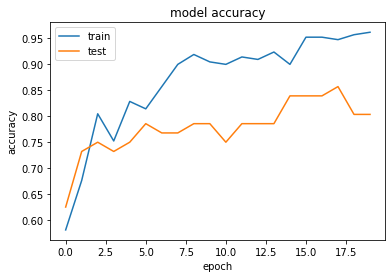

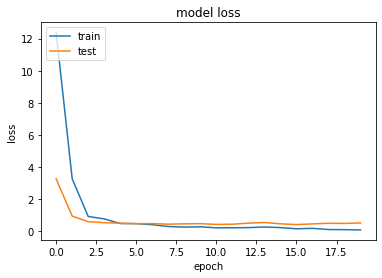

Confusion matrix:
[[37 15]
 [ 5 27]]


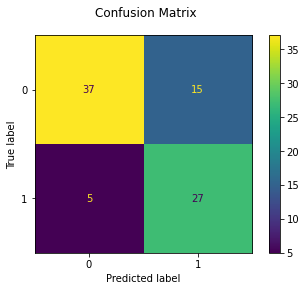

CNN_paper_work_AB_CD_400
making the model...
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 leaky_re_lu_50 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_40 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_51 (LeakyReLU)  (None, 32, 32, 64)        0         
        

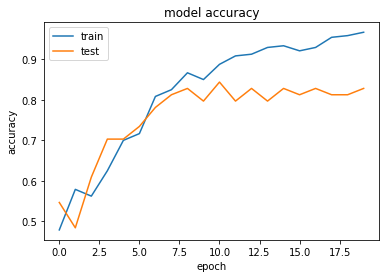

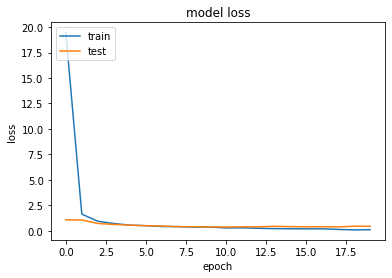

Confusion matrix:
[[40 17]
 [ 7 32]]


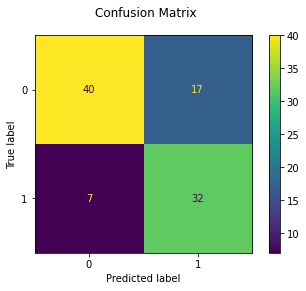

CNN_paper_work_AB_CD_500
making the model...
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 leaky_re_lu_55 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_44 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_56 (LeakyReLU)  (None, 32, 32, 64)        0         
        

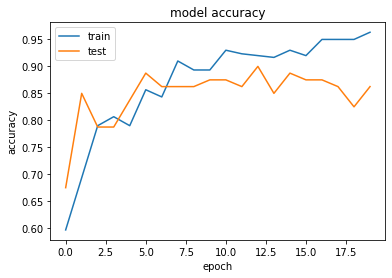

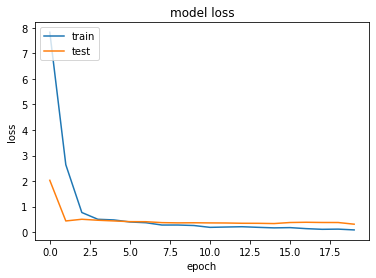

Confusion matrix:
[[67  6]
 [21 26]]


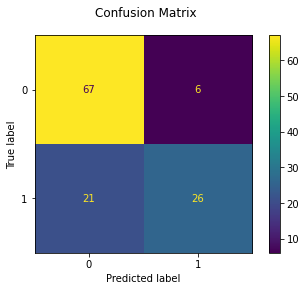

CNN_paper_work_AB_CD_1000
making the model...
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 leaky_re_lu_60 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_48 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_61 (LeakyReLU)  (None, 32, 32, 64)        0         
       

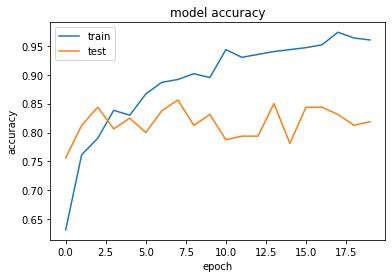

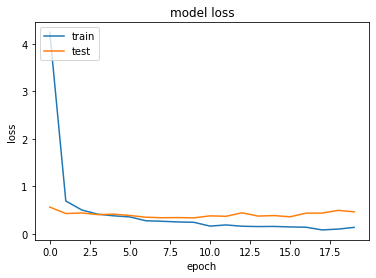

Confusion matrix:
[[116  29]
 [ 18  77]]


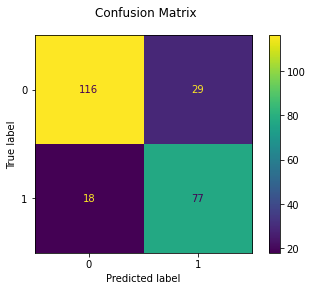

CNN_paper_work_AB_CD_2000
making the model...
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 leaky_re_lu_65 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_52 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_66 (LeakyReLU)  (None, 32, 32, 64)        0         
       

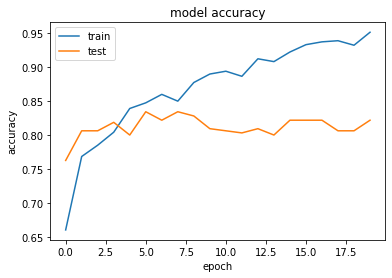

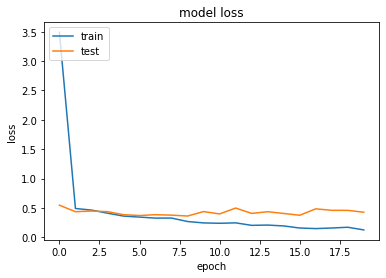

Confusion matrix:
[[246  22]
 [ 47 165]]


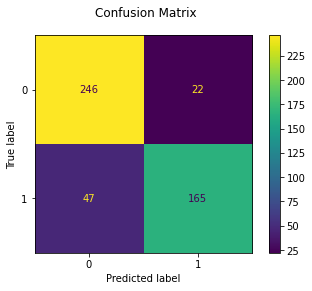

CNN_paper_work_AB_CD_10000
making the model...
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 leaky_re_lu_70 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_56 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_71 (LeakyReLU)  (None, 32, 32, 64)        0         
      

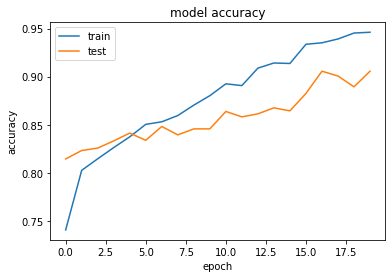

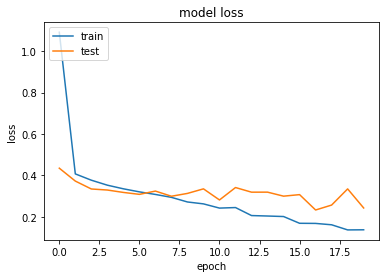

Confusion matrix:
[[1263   83]
 [ 124  930]]


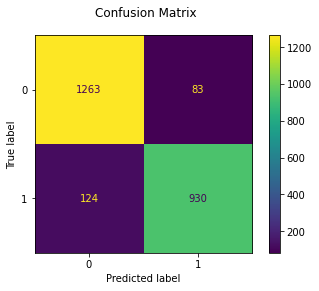

CNN_paper_work_AB_CD_50000
making the model...
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 leaky_re_lu_75 (LeakyReLU)  (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_60 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_46 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_76 (LeakyReLU)  (None, 32, 32, 64)        0         
      

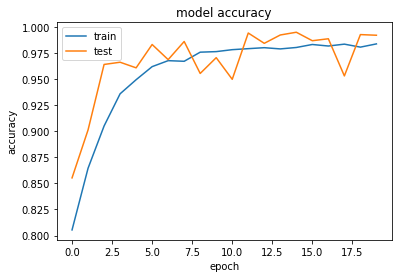

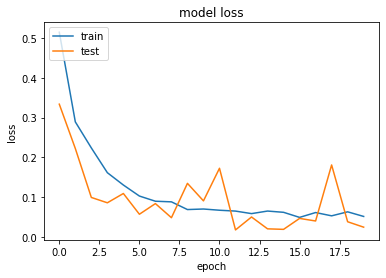

Confusion matrix:
[[6785    0]
 [  60 5155]]


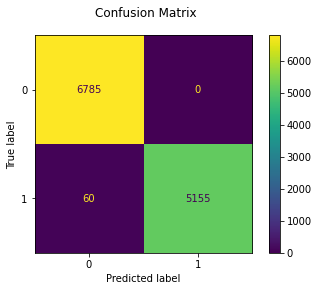

In [1]:
from models.trainModel import run as generate_new_model
from models.CNN.CNNmodel import CNN
different_traning_sizes = [10,25,50,75,100,150,200,250,300,350,400,500,1000,2000,10000,50000]
for i in different_traning_sizes:
    name = f"CNN_paper_work_AB_CD_phi_{i}"
    print(name)
    generate_new_model(constructor=CNN,
                           name=name, save=True, verbose=True,data_size_cap=i)

In [1]:
print("Wowowowowowowow")
from models.trainModel import load_model
ai_for_phi_testing = [load_model(f"CNN_paper_work_AB_CD_{350}")]


Wowowowowowowow


In [ ]:
import run

from TA.subset.try_all import TryAll
from TA.subset.random_w_hash import RandomWHashSelect
from TA.subset.random_select import RandomSelect
from TA.delta.squaredSum import SquaredSum
import time

from utils.global_props import set_e, set_B, set_mu
print("load AI...")
print("done")
sampling_attempts = [1000000000] #"infinite"
deltas = [SquaredSum()]
sub_set_selectors = [TryAll()]

#different_e_values = range(25,0,-1)
#different_B_values = list(range(0,9))
different_mu_values = [0.1,1,10,20,30,40,50,60,70,80,85,90,95,100,105,110,115,120,130,140,150,200,500]




"""
for B in different_B_values:
set_B(B)
for e in different_e_values:
set_e(e)
"""
for mu in different_mu_values:
    print("attempting mu:",mu)
    set_mu(mu)
    run.main_run_system(re_train=False,clean_data=False, deltas=deltas, ai_models=ai_for_phi_testing,
                         differentNrAttempts=sampling_attempts,subset_selectors=sub_set_selectors, verbose=True)

load AI...
done
attempting mu: 0.1
model: CNN_paper_work_AB_CD_350
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
early return at 31 1
model: CNN_paper_work_AB_CD_350
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
early return at 450 2
model: CNN_paper_work_AB_CD_350
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
early return at 4060 3
model: CNN_paper_work_AB_CD_350
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
early return at 25480 4
model: CNN_paper_work_AB_CD_350
subset_selector: TryAll
compatibility_evalutator: Mean_Square_Error
delta: SquaredSum
attemps: 1000000000
Start load..
end load
early return at 117936 5
model: CNN_paper_work_AB_CD_350
subset_selector: T

In [6]:
from utils.dataset import load_dataset
from utils.common import remove_digit_from_labels
from TA.Lambda.mean_square_error import MSE
from models.trainModel import load_model
import random
def sub_sample_test(valid_X, valid_labels, sample_size):
    all_data_zip = []
    for i in range(len(valid_labels)):
        all_data_zip.append((valid_X[i], valid_labels[i]))

    picks = random.sample(all_data_zip, sample_size)

    valid_X, valid_labels = zip(*picks)
    return valid_X, valid_labels

def prop_map_display(model):
    print("loading...")
    X, y, labels = load_dataset()
    print("loading done!")
    labels = remove_digit_from_labels(labels)
    mse = MSE()
    prop_map = mse._get_probaility_map_ai(ai_model=model, valid_X=X, valid_labels=labels)
    for elem in prop_map.keys():
        print(str(prop_map[elem]*100).replace(".",","))

In [7]:
for model in ai_models:
    print("#"*10,str(model),"#"*10)
    prop_map_display(model) 

########## CNN_paper_work_AB_CD_10 ##########
loading...
loading done!
0,0
43,789808917197455
43,666666666666664
41,679873217115684
44,88817891373802
61,059190031152646
58,41269841269842
65,38461538461539
61,88118811881188
61,98347107438017
60,099337748344375
71,83544303797468
71,06518282988871
70,06172839506173
70,95238095238095
79,2393026941363
########## CNN_paper_work_AB_CD_25 ##########
loading...
loading done!
0,0
38,853503184713375
36,16666666666667
42,313787638668785
37,69968051118211
53,58255451713395
53,96825396825397
50,16025641025641
49,504950495049506
51,570247933884296
50,82781456953642
62,5
62,00317965023847
59,413580246913575
61,42857142857143
77,4960380348653
########## CNN_paper_work_AB_CD_50 ##########
loading...
loading done!
0,0
38,69426751592357
36,333333333333336
40,88748019017432
34,98402555910543
53,11526479750779
55,07936507936508
54,166666666666664
47,35973597359736
51,404958677685954
48,01324503311258
68,82911392405063
71,2241653418124
71,75925925925925
65,2

In [ ]:
# this is going for all data. Should give same lambda then
for model in ai_models:
    print("#"*10,str(model),"#"*10)
    prop_map_display(model) 

########## CNN_paper_work_AB_CD_10 ##########


In [23]:
i = [1250]
names = list(map(lambda x: f"CNN_aligment_test_{x}", i))
for name in names:
    print("#"*10,name,"#"*10)
    prop_map_display(name) 

########## CNN_aligment_test_1250 ##########
0,0
0,641025641025641
1,2464046021093003
21,547502448579824
30,125523012552303
50,10615711252654
46,09450337512054
89,60155490767735


In [5]:
from utils.dataset import load_dataset
X, y, labels = load_dataset()
from utils.common import remove_digit_from_labels
labels = remove_digit_from_labels(labels)

In [6]:
mse = MSE()
prop_map = mse._get_probaility_map_ai(ai_model=model, valid_X=X, valid_labels=labels)

In [7]:
for elem in prop_map.keys():
    print("'"+str(elem) + "'" +  ":" + str(prop_map[elem]))

'':0.0
'A':0.0
'B':0.0
'C':0.0
'D':0.0
'AB':0.8035714285714286
'AC':0.10294117647058823
'AD':0.21666666666666667
'BC':0.07575757575757576
'BD':0.09615384615384616
'CD':0.7435897435897436
'ABC':0.9880952380952381
'ABD':0.9016393442622951
'ACD':0.9841269841269841
'BCD':0.9827586206896551
'ABCD':0.9850746268656716


In [21]:
from models.trainModel import load_model

model_10 = load_model("CNN_aligment_test_10")

OSError: No file or directory found at models/savedModels/CNN_aligment_test_10

In [33]:
prop_map_500 = mse._get_probaility_map_ai(ai_model=model_500, valid_X=X, valid_labels=labels)

In [34]:
for elem in prop_map_500.keys():
    print("'"+str(elem) + "'" +  ":" + str(prop_map[elem]))

'':0.0
'A':1.0
'B':1.0
'C':0.9932735426008968
'AB':0.4655408489274304
'AC':0.10053619302949061
'BC':0.054528650646950096
'ABC':0.0013599274705349048


In [35]:
model_200 = load_model("train_set_200")

In [36]:
prop_map_200 = mse._get_probaility_map_ai(ai_model=model_200, valid_X=X, valid_labels=labels)

In [38]:
def show(prop_map):
    for elem in prop_map.keys():
        print("'"+str(elem) + "'" +  ":" + str(prop_map[elem]))

In [39]:
show(prop_map_200)

'':0.0
'A':0.9948074426655128
'B':1.0
'C':0.8147982062780269
'AB':0.6394340483797353
'AC':0.4316353887399464
'BC':0.3077634011090573
'ABC':0.05031731640979148


In [43]:
show(prop_map_500)

'':0.0
'A':1.0
'B':1.0
'C':0.9690582959641255
'AB':0.6768598813327248
'AC':0.3315460232350313
'BC':0.20517560073937152
'ABC':0.010879419764279238


In [42]:
show(prop_map_600)

'':0.0
'A':1.0
'B':1.0
'C':0.9932735426008968
'AB':0.4655408489274304
'AC':0.10053619302949061
'BC':0.054528650646950096
'ABC':0.0013599274705349048


In [41]:
prop_map_600 = mse._get_probaility_map_ai(ai_model=model_600, valid_X=X, valid_labels=labels)

In [44]:
def theoretical_closest(prop_map):
    mse = 0
    for k in prop_map:
        mse += prop_map[k]**2
    return mse

In [46]:
for prop_map in [prop_map_200,prop_map_500,prop_map_600]:
    print(theoretical_closest(prop_map))

3.345973119369467
3.549351434370778
3.2164033617039736


In [47]:
def theoretical_closest_v2(prop_map):
    mse = 0
    for k in prop_map:
        mse += prop_map[k]
    return mse

In [49]:
for prop_map in [prop_map_200,prop_map_500,prop_map_600]:
    print(theoretical_closest_v2(prop_map))

4.2387558035820705
4.193519221035532
3.615239162675303
